# Desafio Data Science
### Dataset : Bank Marketing 

#### Fonte oficial do ​​dataset ​​ : ​​https://archive.ics.uci.edu/ml/datasets/bank+marketing 
#### Dados:  ​​https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip 

### Arquivos incluídos no link acima: 

     ● bank. csv:​​ uma versão reduzida do conjunto de dados;  
     ● bank-full.csv:​​ o conjunto completo; 
     ● bank-names.txt:​​ com a descrição dos campos do conjunto de dados. 

In [33]:
#Import

import numpy as np
import pandas as pd
import random
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Pre-processamento de Dados


In [2]:
#lendo a base de dados

df = pd.read_csv("./bank/bank-full.csv",sep=';')

In [3]:
# verificando os valores nulos

df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [4]:
# verificando os valores únicos do atributo

df['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
# convertendo 'yes','no' em 1,0

df.default.replace(('yes','no'),(1,0),inplace=True)
df.housing.replace(('yes','no'),(1,0),inplace=True)
df.loan.replace(('yes','no'),(1,0),inplace=True)
df.y.replace(('yes','no'),(1,0),inplace=True)

print(df.shape)
df.head()

(45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


# Lista de frequência por categoria.

In [7]:
for i in range(len(df.marital.unique())):
     df["marital_"+str(df.marital.unique()[i])] = (df.marital == df.marital.unique()[i]).astype(int)
    
for j in range(len(df.job.unique())):
    df["job_"+str(df.job.unique()[j])] = (df.job == df.job.unique()[j]).astype(int)
    
for k in range(len(df.contact.unique())):
    df["contact_"+str(df.contact.unique()[k])] = (df.contact == df.contact.unique()[k]).astype(int)

for l in range(len(df.education.unique())):
    df['education_'+str(df.education.unique()[l])] = (df.education == df.education.unique()[l]).astype(int)

for n in range(len(df.month.unique())):
    df['month_'+str(df.month.unique()[n])] = (df.month == df.month.unique()[n]).astype(int)



print(df.describe())
print(df.head()) 

                age       default        balance       housing          loan  \
count  45211.000000  45211.000000   45211.000000  45211.000000  45211.000000   
mean      40.936210      0.018027    1362.272058      0.555838      0.160226   
std       10.618762      0.133049    3044.765829      0.496878      0.366820   
min       18.000000      0.000000   -8019.000000      0.000000      0.000000   
25%       33.000000      0.000000      72.000000      0.000000      0.000000   
50%       39.000000      0.000000     448.000000      1.000000      0.000000   
75%       48.000000      0.000000    1428.000000      1.000000      0.000000   
max       95.000000      1.000000  102127.000000      1.000000      1.000000   

                day      duration      campaign         pdays      previous  \
count  45211.000000  45211.000000  45211.000000  45211.000000  45211.000000   
mean      15.806419    258.163080      2.763841     40.197828      0.580323   
std        8.322476    257.527812      3.0

In [8]:
# sns.pairplot(df)

Text(0.5, 1.0, 'Relação de aceitação e rejeição')

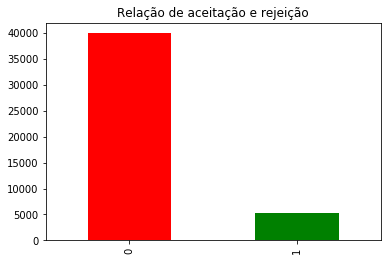

In [9]:
deposit = df['y'].value_counts()
deposit.plot(kind='bar', color=["red",'green'])
plt.title('Relação de aceitação e rejeição')

## 1. Qual profissão tem mais tendência a fazer um empréstimo? De qual tipo? 

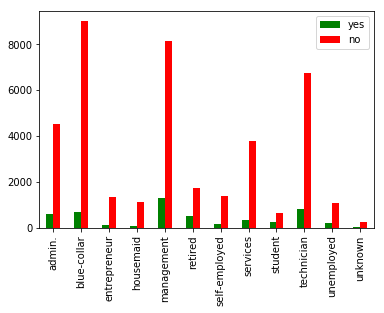

In [10]:
jobyes = df['job'][df.y==1].value_counts()
jobno = df['job'][df.y==0].value_counts()
job = pd.concat([jobyes,jobno],axis=1)
job.columns = ['yes','no']
job.plot(kind='bar', color=["green",'red'])

Text(0.5, 0, 'Housing')

<Figure size 432x288 with 0 Axes>

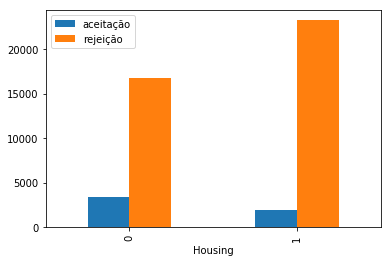

In [11]:
housing_yes = df['housing'][df.y==1].value_counts()
housing_no = df['housing'][df.y==0].value_counts()
housing=pd.concat([housing_yes,housing_no],axis=1)
plt.figure()
housing.columns=['aceitação','rejeição']
housing.plot(kind='bar')
plt.xlabel('Housing')

Text(0.5, 0, 'loan')

<Figure size 432x288 with 0 Axes>

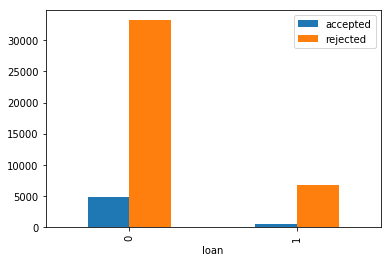

In [12]:
loan_yes = df['loan'][df.y==1].value_counts()
loan_no = df['loan'][df.y==0].value_counts()
loan = pd.concat([loan_yes,loan_no],axis=1)
plt.figure()
loan.columns=['accepted','rejected']
loan.plot(kind='bar')
plt.xlabel('loan')

In [13]:
jobbyhousing = pd.crosstab(df['job'],df['housing'])
jobbyhousing

housing,0,1
job,,
admin.,1989,3182
blue-collar,2684,7048
entrepreneur,618,869
housemaid,842,398
management,4780,4678
retired,1773,491
self-employed,814,765
services,1388,2766
student,689,249


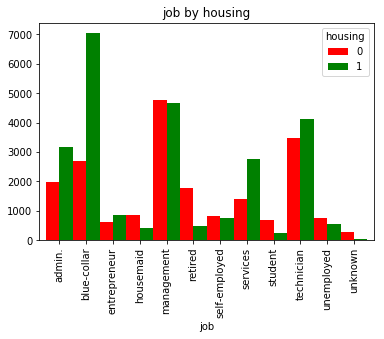

In [14]:
jobbyhousing.plot(kind='bar',width=1.0, color=['red','green'], title='job by housing' ,grid=False)

In [15]:
jobbyloan = pd.crosstab(df['job'],df['loan'])
jobbyloan

loan,0,1
job,,
admin.,4180,991
blue-collar,8048,1684
entrepreneur,1131,356
housemaid,1088,152
management,8205,1253
retired,1955,309
self-employed,1350,229
services,3318,836
student,926,12


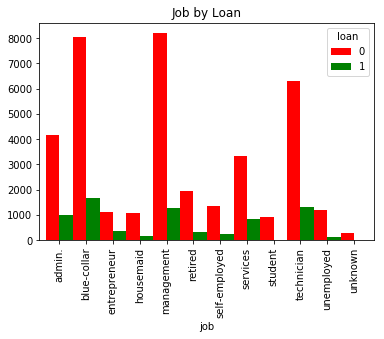

In [16]:
jobbyloan.plot(kind='bar',width=1.0, color=['red','green'], title='Job by Loan' ,grid=False)

### 1. Qual profissão tem mais tendência a fazer um empréstimo? 
        R: blue-collar
### De qual tipo?
        R: housing

## 2. Fazendo uma relação entre número de contatos e sucesso da campanha quais são os pontos relevantes a serem observados? 

    R: obtivemos uma maior taxa de sucesso no grupo com o menor numero de contatos.

In [17]:
df['campaign'][df.y==1].value_counts()

1     2561
2     1401
3      618
4      317
5      139
6       92
7       47
8       32
9       21
11      16
10      14
13       6
17       6
12       4
14       4
15       4
16       2
21       1
29       1
32       1
24       1
20       1
Name: campaign, dtype: int64

## 3. Baseando-se nos resultados de adesão desta campanha qual o número médio e o máximo de ligações que você indica para otimizar a adesão?
    R: Devemos direcionar a proxima campanha para clientes com o perfil de até 3 contatos, com uma média de 3 ligações e o máximo 5 ligações. 

## 4. O resultado da campanha anterior tem relevância na campanha atual?
    R: Sim, Consegimos uma redução nas rejeições comparando dados da campanha anterior com a atual. 

<Figure size 720x1440 with 0 Axes>

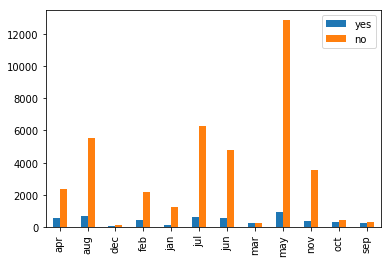

In [18]:
month_yes = df['month'][df.y==1].value_counts()
month_no = df['month'][df.y==0].value_counts()
month = pd.concat([month_yes,month_no],axis=1)
plt.figure(figsize=(10,20))
month.columns = ['yes','no']
month.plot(kind='bar')
plt.show()

<Figure size 720x1440 with 0 Axes>

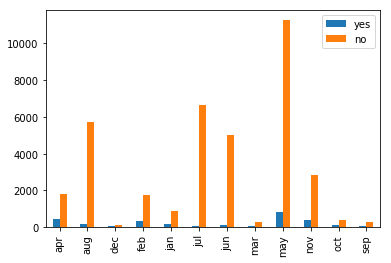

In [19]:
month_yes = df['month'][df.previous==1].value_counts()
month_no = df['month'][df.previous==0].value_counts()
month = pd.concat([month_yes,month_no],axis=1)
plt.figure(figsize=(10,20))
month.columns = ['yes','no']
month.plot(kind='bar')
plt.show()

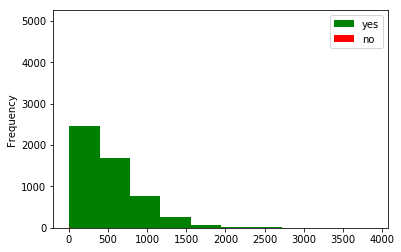

In [20]:
duration_yes = df['duration'][df.y==1]
duration_no = df['previous'][df.y==1]
plt.figure()
duration_yes.plot(kind='hist',color='green')
duration_no.plot(kind='hist',color='red')
plt.legend(['yes','no'])

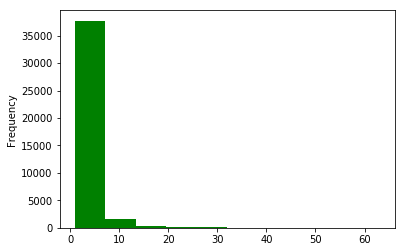

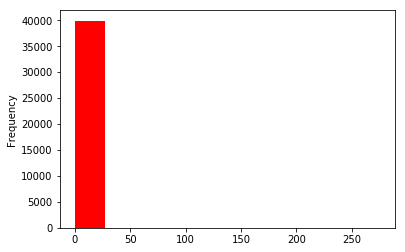

In [21]:
campaign_yes = df['campaign'][df.y==0]
campaign_no = df['previous'][df.y==0]
plt.figure()
campaign_yes.plot(kind='hist',color='green')
plt.figure()
campaign_no.plot(kind='hist',color='red')

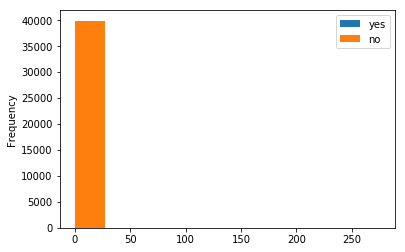

In [22]:
previous_yes = df['previous'][df.y==1]
previous_no = df['previous'][df.y==0]
plt.figure()
previous_yes.plot(kind='hist')
previous_no.plot(kind='hist')
plt.legend(['yes','no'])

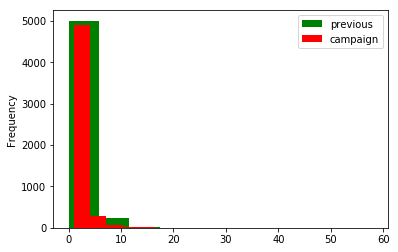

In [23]:
previous_no = df['previous'][df.y==1]
campaign_no =  df['campaign'][df.y==1]
plt.figure()
previous_no.plot(kind='hist',color='green')
campaign_no.plot(kind='hist',color='red')
plt.legend(['previous','campaign'])

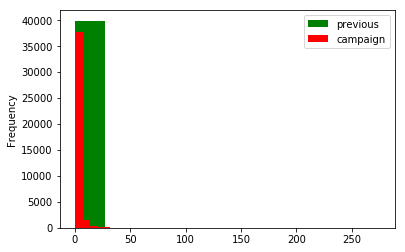

In [24]:
previous_yes = df['previous'][df.y==0]
campaign_yes =  df['campaign'][df.y==0]
plt.figure()
previous_yes.plot(kind='hist',color='green')
campaign_yes.plot(kind='hist',color='red')
plt.legend(['previous','campaign'])

## 5. Qual o fator determinante para que o banco exija um seguro de crédito?

#### R:  Profissionais com idade entre 45 e 59 anos casados com baix nivel de escolaridade.

In [117]:
df2 = pd.get_dummies(df, columns =['job', 'marital', 'default', 'housing', 'loan', 'poutcome'])
df2.drop(df2.columns[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 16, 18, 21, 24]], axis=1, inplace=True)
df2.columns

Index(['y', 'marital_married', 'marital_divorced', 'job_management',
       'job_technician', 'job_blue-collar', 'job_retired', 'job_admin.',
       'job_self-employed', 'job_unemployed', 'job_student', 'contact_unknown',
       'contact_cellular', 'contact_telephone', 'education_tertiary',
       'education_secondary', 'education_unknown', 'education_primary',
       'month_may', 'month_jun', 'month_jul', 'month_aug', 'month_oct',
       'month_nov', 'month_dec', 'month_jan', 'month_feb', 'month_mar',
       'month_apr', 'month_sep', 'job_admin.', 'job_blue-collar',
       'job_management', 'job_retired', 'job_self-employed', 'job_student',
       'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'default_0', 'default_1', 'housing_0', 'housing_1',
       'loan_0', 'loan_1', 'poutcome_failure', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown'],
      dtype='object')

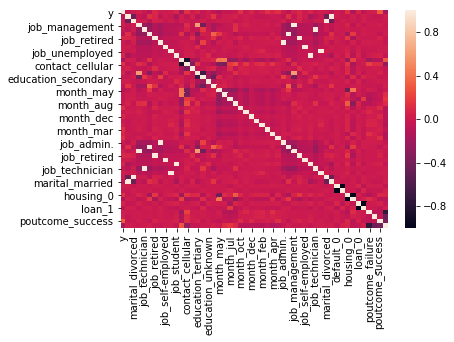

In [118]:
sns.heatmap(df2.corr())
plt.show()

In [119]:
print(df2.shape)
df2.head()

(45211, 50)


,y,marital_married,marital_divorced,job_management,job_technician,job_blue-collar,job_retired,job_admin.,job_self-employed,job_unemployed,...,default_0,default_1,housing_0,housing_1,loan_0,loan_1,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,1,0,1,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
3,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1


In [120]:
X = df2.iloc[:,1:]
y = df2.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.shape

(33908, 49)

In [121]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [122]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[9825  153]
 [1091  234]]


In [123]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.89


In [124]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      9978
           1       0.60      0.18      0.27      1325

   micro avg       0.89      0.89      0.89     11303
   macro avg       0.75      0.58      0.61     11303
weighted avg       0.87      0.89      0.86     11303



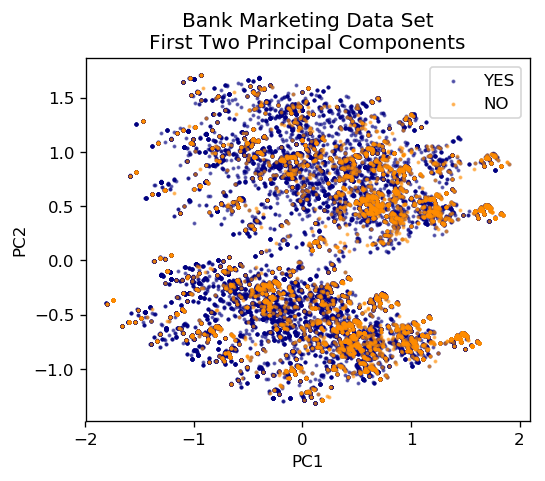

In [125]:
from sklearn.decomposition import PCA
X = df2.iloc[:,1:]
y = df2.iloc[:,0]
pca = PCA(n_components=2).fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(pca, y, random_state=0)

plt.figure(dpi=120)
plt.scatter(pca[y.values==0,0], pca[y.values==0,1], alpha=0.5, label='YES', s=2, color='navy')
plt.scatter(pca[y.values==1,0], pca[y.values==1,1], alpha=0.5, label='NO', s=2, color='darkorange')
plt.legend()
plt.title('Bank Marketing Data Set\nFirst Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.gca().set_aspect('equal')
plt.show()

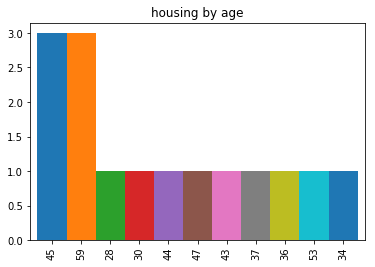

In [126]:
duration_age = df['age'][df.duration>2800].value_counts()
duration_age.plot(kind='bar',width=1.0, title='housing by age' ,grid=False)

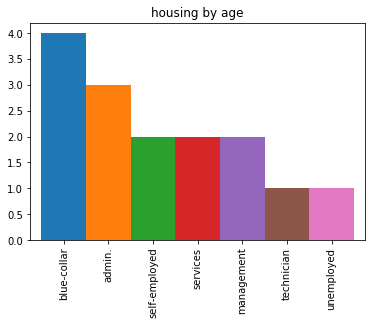

In [127]:
job_duration = df['job'][df.duration>2800].value_counts()
job_duration.plot(kind='bar',width=1.0, title='housing by age' ,grid=False)

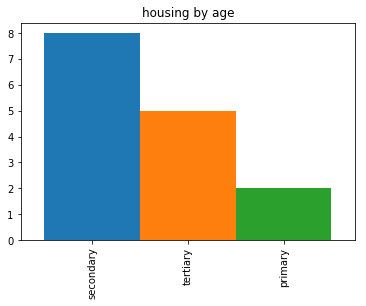

In [128]:
education_duration = df['education'][df.duration>2800].value_counts()
education_duration.plot(kind='bar',width=1.0, title='housing by age' ,grid=False)

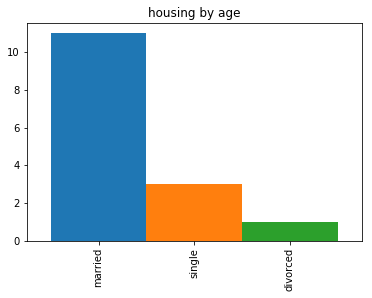

In [129]:
marital_duration = df['marital'][df.duration>2800].value_counts()
marital_duration.plot(kind='bar',width=1.0, title='housing by age' ,grid=False)

## 6. Quais são as características mais proeminentes de um cliente que possua empréstimo imobiliário?


#### R: 
        Estão na faixa de 23 a 47 anos
        Trabalham com: services, admin, technician, management e blue-collar
        São Casados
        Estudaram ate o Ensino Médio

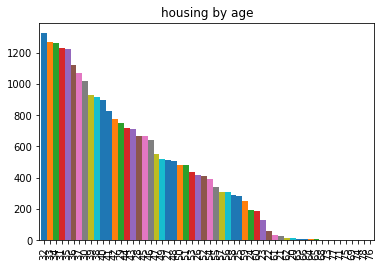

In [25]:
housing_age = df['age'][df.housing==1].value_counts()
housing_age.plot(kind='bar',width=1.0, title='housing by age' ,grid=False)

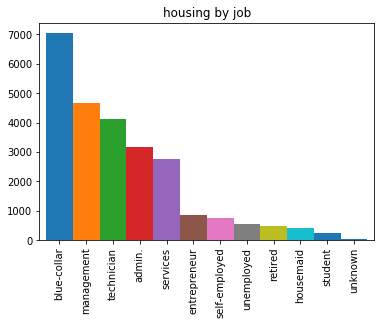

In [26]:
housing_job = df['job'][df.housing==1].value_counts()
housing_job.plot(kind='bar',width=1.0, title='housing by job' ,grid=False)

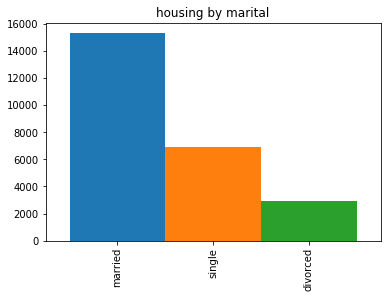

In [27]:
housing_marital = df['marital'][df.housing==1].value_counts()
housing_marital.plot(kind='bar',width=1.0, title='housing by marital' ,grid=False)

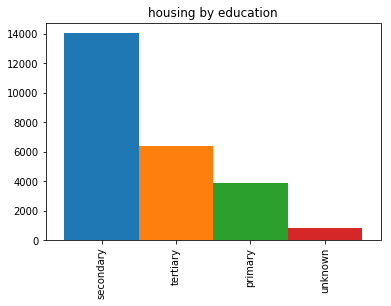

In [28]:
housing_education = df['education'][df.housing==1].value_counts()
housing_education.plot(kind='bar',width=1.0, title='housing by education' ,grid=False)